In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, GroupShuffleSplit,RandomizedSearchCV
from xgboost import XGBClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [64]:
train_1 = pd.read_csv('Train.csv')
test_1 = pd.read_csv('Test.csv')
train = train_1.copy()
test = test_1.copy()

# delete = ['f23','f24','f25','f26','f27']
# for i in delete:
#     del train[i]

In [65]:
Y = train.grade
X = train.drop(['grade'],axis=1)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)
X_sc.shape

(620, 28)

In [67]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 13, sampling_strategy='all')
X_train,Y_train = sm.fit_sample(X_sc,Y)
print(f"After OverSampling {X_train.shape}")

After OverSampling (2360, 28)


In [68]:
train_over = pd.DataFrame(X_train,columns=X.columns.to_list())
train_over['grade'] = Y_train

In [69]:
train_over['grade'].value_counts()

3    472
1    472
4    472
2    472
0    472
Name: grade, dtype: int64

In [70]:
x_train,x_test,y_train,y_test = train_test_split(train_over.drop(['grade'],axis=1),train_over.grade,test_size=0.30,random_state=27)

In [71]:
import lightgbm as lgb
from sklearn.metrics import log_loss,accuracy_score
lgbc = lgb.LGBMClassifier()
lgbc.fit(train_over.drop(['grade'],axis=1),train_over.grade)
predictions = lgbc.predict_proba(x_test)
predict = lgbc.predict(x_test)
print("logloss: %0.3f " % log_loss(y_test, predictions))
print(accuracy_score(y_test,predict))

logloss: 0.004 
0.9971751412429378


In [72]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
from sklearn.metrics import log_loss,accuracy_score
cat.fit(x_train,y_train)
predictions = cat.predict_proba(x_test)
predict = cat.predict(x_test)
print("logloss: %0.3f " % log_loss(y_test, predictions))
print(accuracy_score(y_test,predict))

0:	learn: 1.5365182	total: 12.8ms	remaining: 12.8s
1:	learn: 1.4677742	total: 23.7ms	remaining: 11.8s
2:	learn: 1.4067019	total: 33.2ms	remaining: 11s
3:	learn: 1.3573986	total: 41.9ms	remaining: 10.4s
4:	learn: 1.3132983	total: 49.3ms	remaining: 9.81s
5:	learn: 1.2662241	total: 56.5ms	remaining: 9.36s
6:	learn: 1.2231637	total: 64.4ms	remaining: 9.14s
7:	learn: 1.1788479	total: 71.8ms	remaining: 8.91s
8:	learn: 1.1380584	total: 80ms	remaining: 8.8s
9:	learn: 1.1025799	total: 87.5ms	remaining: 8.67s
10:	learn: 1.0666021	total: 94.7ms	remaining: 8.51s
11:	learn: 1.0360145	total: 101ms	remaining: 8.36s
12:	learn: 1.0081970	total: 108ms	remaining: 8.19s
13:	learn: 0.9777017	total: 115ms	remaining: 8.07s
14:	learn: 0.9485161	total: 121ms	remaining: 7.97s
15:	learn: 0.9209960	total: 128ms	remaining: 7.89s
16:	learn: 0.8950042	total: 135ms	remaining: 7.81s
17:	learn: 0.8691225	total: 139ms	remaining: 7.59s
18:	learn: 0.8485941	total: 143ms	remaining: 7.4s
19:	learn: 0.8242866	total: 147ms	re

160:	learn: 0.1523146	total: 700ms	remaining: 3.65s
161:	learn: 0.1512645	total: 704ms	remaining: 3.64s
162:	learn: 0.1504353	total: 708ms	remaining: 3.63s
163:	learn: 0.1498350	total: 711ms	remaining: 3.63s
164:	learn: 0.1490622	total: 719ms	remaining: 3.64s
165:	learn: 0.1481728	total: 723ms	remaining: 3.63s
166:	learn: 0.1475473	total: 727ms	remaining: 3.63s
167:	learn: 0.1468741	total: 731ms	remaining: 3.62s
168:	learn: 0.1461277	total: 734ms	remaining: 3.61s
169:	learn: 0.1451375	total: 737ms	remaining: 3.6s
170:	learn: 0.1441983	total: 740ms	remaining: 3.59s
171:	learn: 0.1432724	total: 744ms	remaining: 3.58s
172:	learn: 0.1426706	total: 747ms	remaining: 3.57s
173:	learn: 0.1420730	total: 750ms	remaining: 3.56s
174:	learn: 0.1411333	total: 754ms	remaining: 3.56s
175:	learn: 0.1404055	total: 758ms	remaining: 3.55s
176:	learn: 0.1396823	total: 766ms	remaining: 3.56s
177:	learn: 0.1391019	total: 771ms	remaining: 3.56s
178:	learn: 0.1384522	total: 774ms	remaining: 3.55s
179:	learn: 0

321:	learn: 0.0793455	total: 1.32s	remaining: 2.78s
322:	learn: 0.0790388	total: 1.32s	remaining: 2.77s
323:	learn: 0.0788177	total: 1.33s	remaining: 2.78s
324:	learn: 0.0785336	total: 1.34s	remaining: 2.77s
325:	learn: 0.0782788	total: 1.34s	remaining: 2.77s
326:	learn: 0.0780661	total: 1.34s	remaining: 2.76s
327:	learn: 0.0778813	total: 1.35s	remaining: 2.76s
328:	learn: 0.0776969	total: 1.35s	remaining: 2.75s
329:	learn: 0.0773375	total: 1.35s	remaining: 2.75s
330:	learn: 0.0770126	total: 1.36s	remaining: 2.74s
331:	learn: 0.0767647	total: 1.36s	remaining: 2.74s
332:	learn: 0.0764529	total: 1.36s	remaining: 2.73s
333:	learn: 0.0762708	total: 1.37s	remaining: 2.72s
334:	learn: 0.0759805	total: 1.37s	remaining: 2.72s
335:	learn: 0.0756928	total: 1.37s	remaining: 2.71s
336:	learn: 0.0754950	total: 1.38s	remaining: 2.71s
337:	learn: 0.0751566	total: 1.38s	remaining: 2.7s
338:	learn: 0.0749635	total: 1.38s	remaining: 2.7s
339:	learn: 0.0747821	total: 1.39s	remaining: 2.69s
340:	learn: 0.

512:	learn: 0.0493473	total: 2.01s	remaining: 1.91s
513:	learn: 0.0492846	total: 2.01s	remaining: 1.9s
514:	learn: 0.0491698	total: 2.02s	remaining: 1.9s
515:	learn: 0.0490749	total: 2.02s	remaining: 1.9s
516:	learn: 0.0489988	total: 2.03s	remaining: 1.9s
517:	learn: 0.0489164	total: 2.04s	remaining: 1.9s
518:	learn: 0.0488188	total: 2.04s	remaining: 1.89s
519:	learn: 0.0487356	total: 2.04s	remaining: 1.89s
520:	learn: 0.0486435	total: 2.05s	remaining: 1.88s
521:	learn: 0.0485850	total: 2.05s	remaining: 1.88s
522:	learn: 0.0484553	total: 2.06s	remaining: 1.88s
523:	learn: 0.0483579	total: 2.06s	remaining: 1.87s
524:	learn: 0.0482870	total: 2.06s	remaining: 1.87s
525:	learn: 0.0481287	total: 2.07s	remaining: 1.86s
526:	learn: 0.0480045	total: 2.07s	remaining: 1.86s
527:	learn: 0.0478682	total: 2.07s	remaining: 1.85s
528:	learn: 0.0478149	total: 2.08s	remaining: 1.85s
529:	learn: 0.0477516	total: 2.08s	remaining: 1.85s
530:	learn: 0.0476698	total: 2.09s	remaining: 1.84s
531:	learn: 0.047

680:	learn: 0.0369684	total: 2.64s	remaining: 1.24s
681:	learn: 0.0369273	total: 2.64s	remaining: 1.23s
682:	learn: 0.0368785	total: 2.64s	remaining: 1.23s
683:	learn: 0.0368261	total: 2.65s	remaining: 1.22s
684:	learn: 0.0367815	total: 2.65s	remaining: 1.22s
685:	learn: 0.0367413	total: 2.66s	remaining: 1.22s
686:	learn: 0.0366927	total: 2.66s	remaining: 1.21s
687:	learn: 0.0365983	total: 2.67s	remaining: 1.21s
688:	learn: 0.0365493	total: 2.67s	remaining: 1.21s
689:	learn: 0.0365033	total: 2.67s	remaining: 1.2s
690:	learn: 0.0364557	total: 2.68s	remaining: 1.2s
691:	learn: 0.0364147	total: 2.68s	remaining: 1.19s
692:	learn: 0.0363596	total: 2.68s	remaining: 1.19s
693:	learn: 0.0362898	total: 2.69s	remaining: 1.19s
694:	learn: 0.0362500	total: 2.69s	remaining: 1.18s
695:	learn: 0.0361781	total: 2.69s	remaining: 1.18s
696:	learn: 0.0361015	total: 2.7s	remaining: 1.17s
697:	learn: 0.0360638	total: 2.7s	remaining: 1.17s
698:	learn: 0.0360096	total: 2.7s	remaining: 1.16s
699:	learn: 0.035

864:	learn: 0.0288202	total: 3.32s	remaining: 519ms
865:	learn: 0.0287951	total: 3.33s	remaining: 515ms
866:	learn: 0.0287576	total: 3.33s	remaining: 511ms
867:	learn: 0.0287125	total: 3.34s	remaining: 507ms
868:	learn: 0.0286848	total: 3.34s	remaining: 504ms
869:	learn: 0.0286447	total: 3.35s	remaining: 500ms
870:	learn: 0.0286036	total: 3.35s	remaining: 496ms
871:	learn: 0.0285469	total: 3.35s	remaining: 493ms
872:	learn: 0.0284934	total: 3.36s	remaining: 489ms
873:	learn: 0.0284340	total: 3.36s	remaining: 485ms
874:	learn: 0.0283715	total: 3.37s	remaining: 481ms
875:	learn: 0.0283269	total: 3.37s	remaining: 477ms
876:	learn: 0.0283016	total: 3.37s	remaining: 473ms
877:	learn: 0.0282586	total: 3.38s	remaining: 469ms
878:	learn: 0.0282240	total: 3.38s	remaining: 465ms
879:	learn: 0.0281646	total: 3.38s	remaining: 461ms
880:	learn: 0.0281330	total: 3.39s	remaining: 458ms
881:	learn: 0.0281056	total: 3.39s	remaining: 454ms
882:	learn: 0.0280795	total: 3.4s	remaining: 450ms
883:	learn: 0

In [73]:
def splitter(train, features, target, ts=True):
    if ts:
        trainX, validX, trainY, validY = train_test_split(train[features],
                                                          train[target], test_size=0.2,
                                                          random_state=13, shuffle=False)
    else:
        trainX, validX, trainY, validY = train_test_split(train[features],
                                                      train[target], test_size=0.2,
                                                      random_state=13)
    return trainX, validX, trainY, validY

def lgb_model(train, test, features, target, ts=True):
    evals_result = {}
    trainX, validX, trainY, validY = splitter(train, features, target, ts=ts)
    print("LGB Model")
    lgb_train_set = lgb.Dataset(trainX, label=trainY)
    lgb_valid_set = lgb.Dataset(validX, label=validY)

    MAX_ROUNDS = 2000
    lgb_params = {
        "boosting": 'gbdt',  # "dart",
        "num_class":5,
        "learning_rate": 0.01,
        "nthread": -1,
        "seed": 13,
        "num_boost_round": MAX_ROUNDS,
        "objective": "multiclass",
        "metric": "multi_logloss",
    }

    lgb_model = lgb.train(
        lgb_params,
        train_set=lgb_train_set,
        valid_sets=[lgb_train_set, lgb_valid_set],
        early_stopping_rounds=50,
        verbose_eval=100,
        evals_result=evals_result,
    )

    lgb.plot_importance(lgb_model, figsize=(24, 24))
    lgb.plot_metric(evals_result, metric='multi_logloss')
    
    preds = lgb_model.predict(test[feat])
    return lgb_model, preds


In [77]:
feat = train_over.columns.to_list()
target = 'grade'
feat.remove(target)

LGB Model
Training until validation scores don't improve for 50 rounds


/home/harsh/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	training's multi_logloss: 0.532448	valid_1's multi_logloss: 0.546303
[200]	training's multi_logloss: 0.225417	valid_1's multi_logloss: 0.245116
[300]	training's multi_logloss: 0.103297	valid_1's multi_logloss: 0.122187
[400]	training's multi_logloss: 0.0506985	valid_1's multi_logloss: 0.0668051
[500]	training's multi_logloss: 0.0271174	valid_1's multi_logloss: 0.0417907
[600]	training's multi_logloss: 0.0155537	valid_1's multi_logloss: 0.0282491
[700]	training's multi_logloss: 0.00926081	valid_1's multi_logloss: 0.0221137
[800]	training's multi_logloss: 0.00594968	valid_1's multi_logloss: 0.0190908
[900]	training's multi_logloss: 0.00420851	valid_1's multi_logloss: 0.018375
Early stopping, best iteration is:
[935]	training's multi_logloss: 0.00381015	valid_1's multi_logloss: 0.0180569


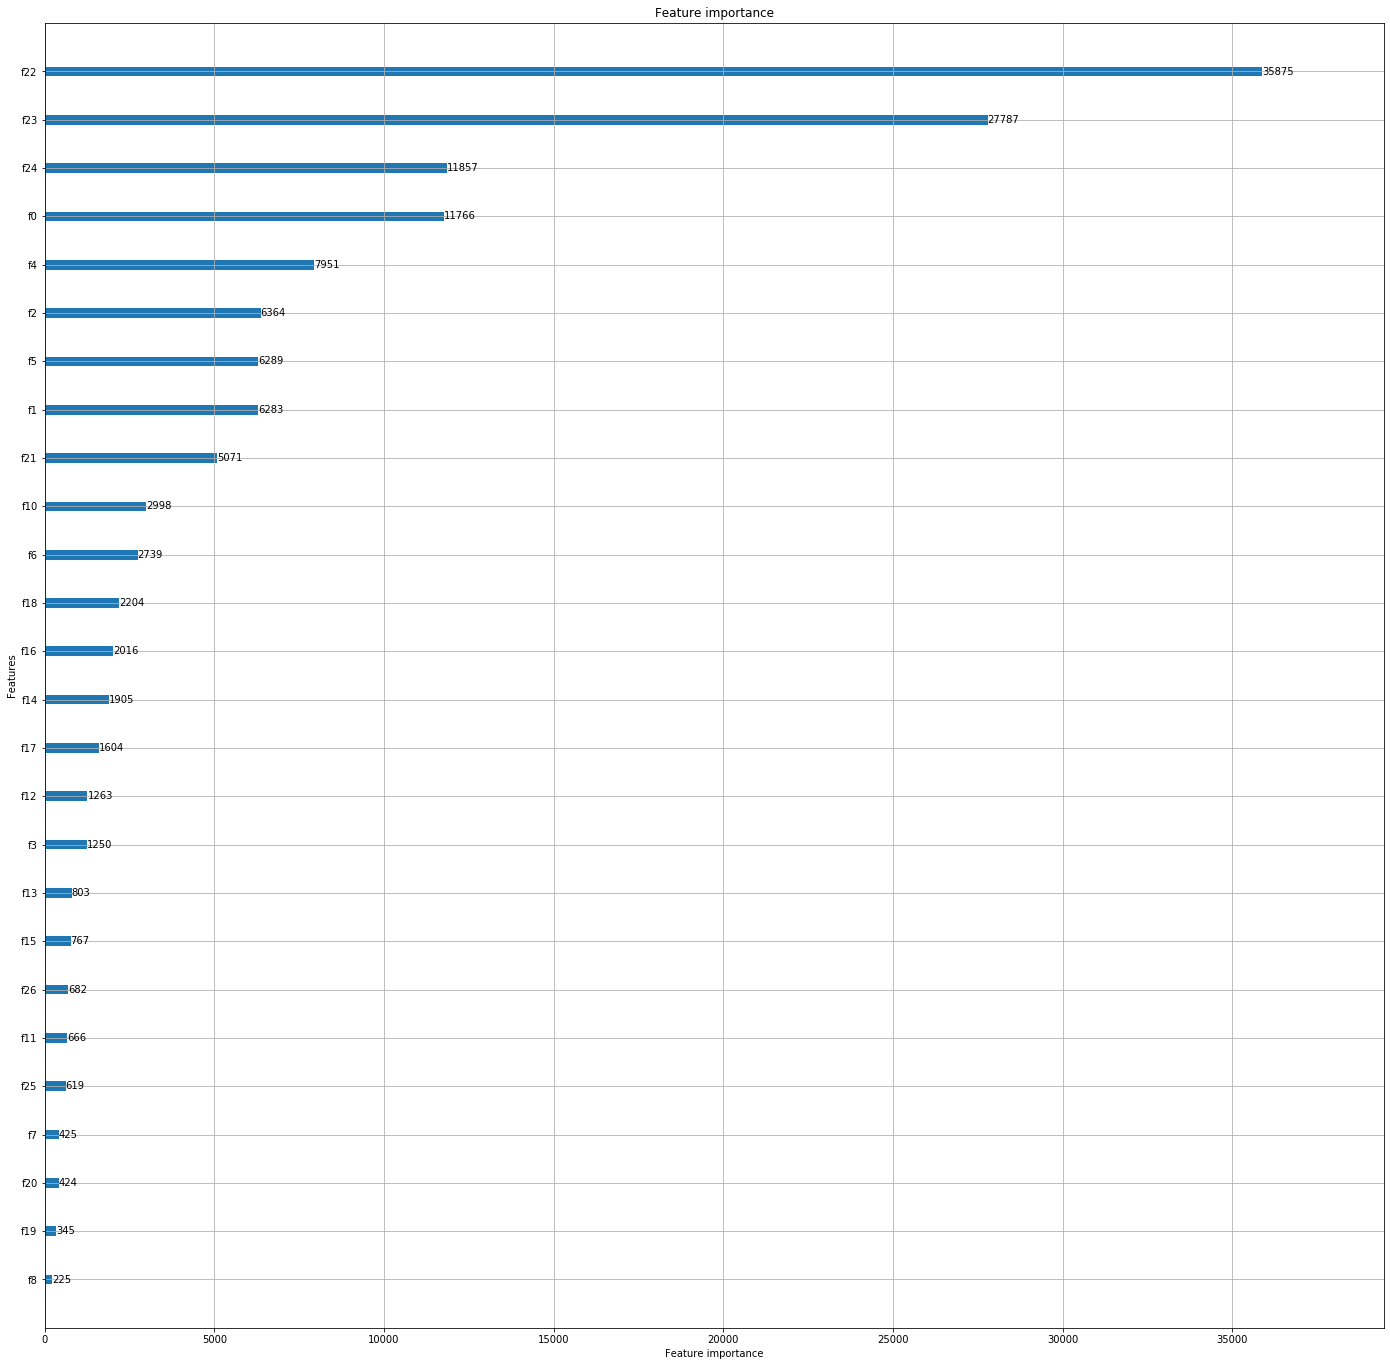

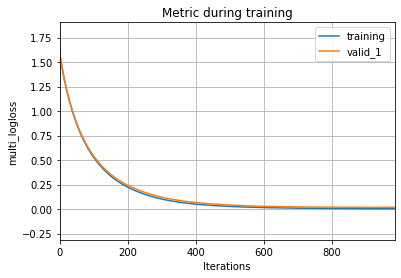

In [78]:
lgbM, lgb_preds = lgb_model(train_over, test, feat, target, ts=False)

In [79]:
# for i in delete:
#     del test[i]

In [84]:
pred = cat.predict_proba(test[feat])

In [85]:
sub = pd.DataFrame(pred)

In [86]:
sub.to_excel("final.xlsx",index=False)

In [87]:
sub

,0,1,2,3,4
0,0.077926,0.089749,0.556119,0.139670,0.136536
1,0.060923,0.135839,0.213605,0.529288,0.060345
2,0.103237,0.079597,0.459277,0.165950,0.191940
3,0.077785,0.019398,0.163198,0.679694,0.059926
4,0.078922,0.041406,0.526567,0.284281,0.068824
...,...,...,...,...,...
261,0.082985,0.083898,0.397302,0.388269,0.047547
262,0.056390,0.057654,0.475456,0.281509,0.128991
263,0.082985,0.083898,0.397302,0.388269,0.047547
264,0.082409,0.163007,0.439035,0.206456,0.109093
